In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("mcdonalds.csv")
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [3]:
df.shape

(1453, 15)

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


<Axes: xlabel='Like'>

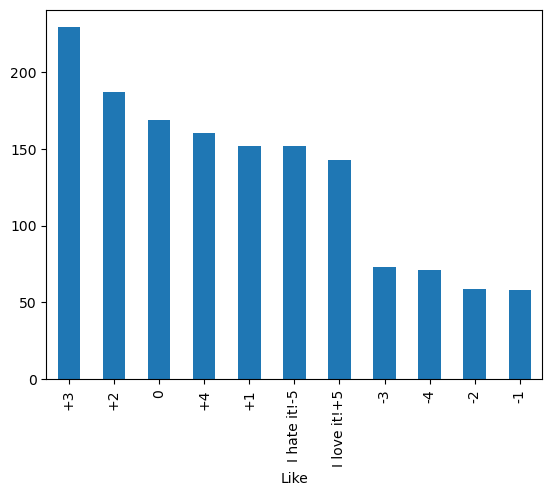

In [7]:
df['Like'].value_counts().plot(kind='bar')

In [8]:
df['Like'] = df['Like'].str.replace('I hate it!-5','-5')
df['Like'] = df['Like'].str.replace('I love it!+5','+5')

In [9]:
df['Like'].dtype

dtype('O')

<Axes: xlabel='Age'>

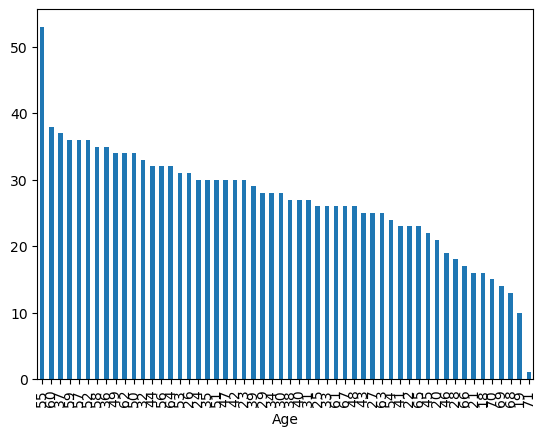

In [10]:
df['Age'].value_counts().plot(kind='bar')

<Axes: xlabel='VisitFrequency'>

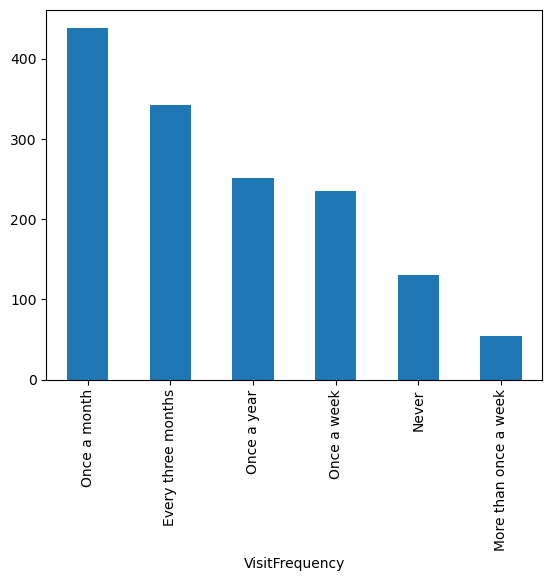

In [11]:
df['VisitFrequency'].value_counts().plot(kind='bar')

In [12]:
df['VisitFrequency'] = df['VisitFrequency'].str.replace('Once a month','12')
df['VisitFrequency'] = df['VisitFrequency'].str.replace('Every three months','4')
df['VisitFrequency'] = df['VisitFrequency'].str.replace('Once a year','1')
df['VisitFrequency'] = df['VisitFrequency'].str.replace('Once a week','52')
df['VisitFrequency'] = df['VisitFrequency'].str.replace('Never','0')
df['VisitFrequency'] = df['VisitFrequency'].str.replace('More than once a week','104')

<Axes: xlabel='Gender'>

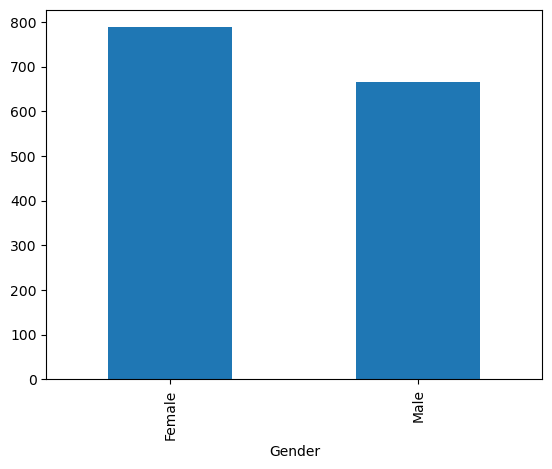

In [13]:
df['Gender'].value_counts().plot(kind='bar')

In [14]:
df = pd.get_dummies(df, columns= ["Gender"], drop_first=True)

In [15]:
df['Gender_Male'] = df['Gender_Male'].astype('int')

In [16]:
df = df.replace({"Yes": 1, "No": 0})

In [17]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender_Male
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,4,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,4,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,4,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,52,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,12,1


D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

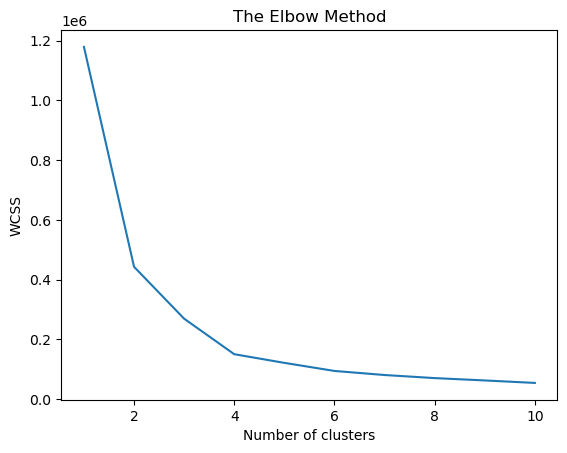

In [18]:
#K Means Clustering
X = df.iloc[:, 11:13].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)

D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
for i, cluster_label in enumerate(kmeans.labels_):
    print(cluster_label+1)

3
3
3
4
3
3
3
2
3
1
3
1
3
3
3
3
1
1
3
5
1
1
2
5
1
1
1
1
3
1
1
1
3
1
4
3
1
3
1
3
1
5
5
1
3
1
3
3
1
3
4
1
3
3
3
3
3
3
5
1
2
2
2
3
1
1
3
2
3
3
3
3
3
1
4
1
4
3
3
1
3
3
3
4
1
3
3
4
1
3
2
1
1
1
1
1
4
1
3
2
3
1
5
3
3
3
1
1
3
3
3
2
3
3
1
3
4
1
1
3
1
3
3
3
1
3
3
2
1
1
3
3
1
1
3
3
5
3
3
1
1
1
3
2
1
3
2
3
1
1
3
1
3
2
3
3
3
1
3
3
3
3
4
1
3
1
3
3
3
2
1
3
1
4
3
1
3
1
5
3
1
1
3
1
3
3
3
1
3
3
1
2
4
1
1
1
3
3
1
2
5
2
1
3
4
1
1
1
3
3
3
3
2
2
3
1
3
3
1
3
3
3
1
3
3
3
3
1
3
1
2
3
4
3
3
4
5
3
3
3
3
3
3
3
5
3
3
2
3
5
1
3
5
2
3
3
3
3
3
4
2
1
4
3
1
2
3
3
1
1
1
1
4
2
1
3
3
1
2
3
3
2
1
1
1
4
3
3
1
3
3
3
3
4
3
1
1
1
1
5
4
1
1
1
3
3
1
1
2
1
3
3
3
1
3
1
2
3
4
2
1
1
3
1
3
1
1
1
1
1
1
3
1
1
3
3
3
1
3
4
3
3
1
1
1
3
2
3
1
1
3
4
3
3
3
4
4
1
2
1
2
4
3
4
1
3
3
1
3
5
3
3
2
3
2
3
1
1
1
3
2
1
3
3
1
2
3
3
3
1
5
1
3
3
3
3
3
1
2
3
4
3
4
1
4
1
3
3
1
1
3
1
3
3
3
1
1
3
4
4
1
1
1
5
2
1
5
3
3
3
3
3
1
1
4
1
1
3
1
3
1
3
2
3
3
3
2
5
4
5
3
3
1
1
3
1
3
3
1
3
1
3
1
1
1
1
3
1
1
1
1
1
1
1
1
5
3
3
1
1
3
3
1
3
4
4
3
1
1
1
3
1
1
3
3
1
1
3
2
3


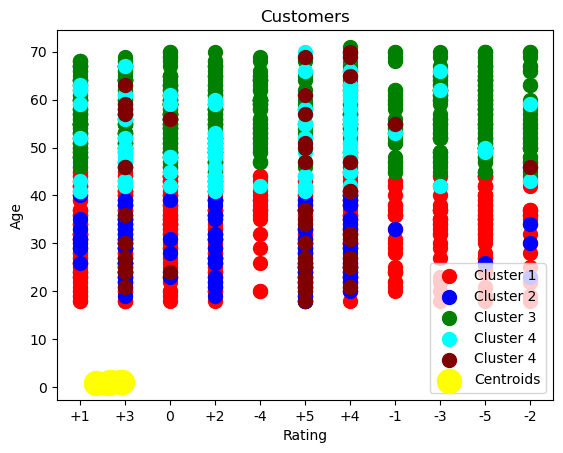

In [21]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'maroon', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Customers')
plt.xlabel('Rating')
plt.ylabel('Age')
plt.legend()
plt.show()

In [22]:
df_new = df.drop(labels=['Like','Age','VisitFrequency','Gender_Male'], axis=1) 
df_new

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [23]:
df['ClusterLabel'] = y_kmeans+1

In [24]:
df.iloc[5:568]

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender_Male,ClusterLabel
5,1,1,0,1,0,1,1,1,0,0,0,+2,55,4,1,3
6,1,1,1,1,0,1,0,1,1,1,0,+2,56,4,0,3
7,1,1,0,1,1,1,1,1,0,0,0,+5,23,52,0,2
8,0,0,0,1,1,0,0,0,1,0,1,-5,58,1,1,3
9,1,1,0,1,1,1,0,1,1,0,0,+1,32,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1,1,0,0,0,0,1,1,0,0,0,+5,25,52,1,2
564,0,1,0,1,1,0,0,0,1,0,1,-3,48,4,1,3
565,1,1,0,1,0,1,1,1,0,0,0,+3,56,52,0,4
566,0,1,0,1,1,1,1,0,0,0,1,-3,46,1,0,3


In [25]:
df['ClusterLabel'].value_counts()

ClusterLabel
3    641
1    523
2    134
4    101
5     54
Name: count, dtype: int64

In [26]:
df_new = df.drop(labels=['Like','Age','VisitFrequency','Gender_Male', 'ClusterLabel'], axis=1)
df_new

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [27]:
#Principal Component Analysis
from sklearn import preprocessing
from sklearn.decomposition import PCA
pca_data = preprocessing.scale(df_new)
pca = PCA(n_components=11)
pc = pca.fit_transform(pca_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


In [28]:
pca.explained_variance_ratio_

array([0.25556637, 0.14834762, 0.12546909, 0.09826971, 0.08348356,
       0.07109102, 0.06498559, 0.05384477, 0.04762809, 0.02796379,
       0.0233504 ])

In [29]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['feature'] = df_new.columns.values
loadings_df = loadings_df.set_index('feature')
loadings_df

D:\annaconda\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
feature,,,,,,,,,,,
yummy,-0.406955,0.282615,-0.259588,0.026237,0.346857,-0.124916,0.159878,0.016587,-0.195341,0.691446,-0.091851
convenient,-0.308827,-0.045682,-0.317151,-0.009424,-0.437148,0.188966,-0.661814,0.150033,-0.336539,0.028831,0.021460
spicy,-0.023320,0.069982,0.020170,0.845496,-0.185551,0.438661,0.214188,-0.027835,0.025239,0.058187,-0.041960
fattening,0.177861,-0.205590,-0.608077,-0.023396,0.086934,0.107520,-0.023851,-0.720478,0.105052,-0.020311,-0.074626
greasy,0.267796,-0.136300,-0.389568,0.330854,0.343713,-0.278329,-0.307300,0.487275,0.346137,-0.015160,-0.031047
fast,-0.213039,-0.282441,-0.211395,0.090363,-0.568939,-0.572734,0.392436,0.055976,0.099235,0.017917,-0.054448
cheap,-0.289134,-0.575032,0.125157,0.114477,0.256981,0.020657,-0.008895,-0.064667,-0.062027,0.060323,0.691923
tasty,-0.426115,0.242199,-0.269648,0.072691,0.286099,-0.053053,0.197364,0.059289,-0.213587,-0.713426,0.006426
expensive,0.290944,0.567528,-0.183298,0.035510,-0.207362,-0.171160,0.015198,-0.061727,-0.009675,0.029581,0.693614


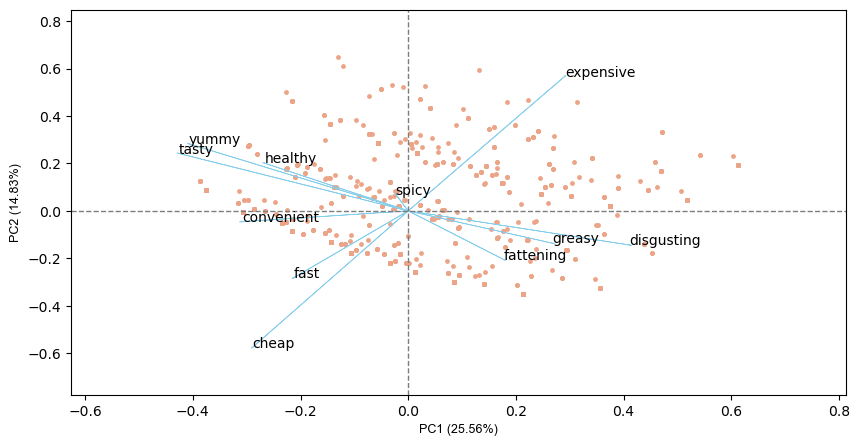

In [30]:
!pip install bioinfokit
pca_scores = PCA().fit_transform(pca_data)
from bioinfokit.visuz import cluster
# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, 
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))